# Phase 2, Composite Space (verb + noun)

In this experiment, we use the results of a noun vector space to enhance a verb space. This is done by adding the similarity value of all similar terms of a given basis word. The similarity values are normalized so that the total value is no greater than 1. This distributes the meaning of the co-occurring word across all of its similar terms. 

### Load Data

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys, random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.experiments import CompositeVerb, CompositeVerb2, CompositeVerbSubObj, VerbExperiment1
from project_code.noun_experiments import NounExperiment1
from project_code.semspace import SemSpace

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_composite_space', version='c')

This is Text-Fabric 3.4.12
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API 3.4.12</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

#### Load the Noun Space

In [2]:
ne1 = NounExperiment1(tf_api=tf_api)
print(f'noun experiment with dim {ne1.data.shape} ready...')
ns1 = SemSpace(ne1, info=True)

noun experiment with dim (6357, 2744) ready...
  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     1.54s Finished PPMI...
  1.54s Building pairwise matrices...
    34s space is ready!


#### Build Composite Experiment

In [25]:
indent(reset=True)
info('building composite experiment...')
ce1 = CompositeVerb(ns1.sim_pmi_normalized, tf_api=tf_api) 
info(f'composite experiment with dim {ce1.data.shape} ready...')

  0.00s building composite experiment...
 1m 07s composite experiment with dim (348488, 794) ready...


### Build Composite Space
This may take some time.

In [26]:
cs1 = SemSpace(ce1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |       33s Finished PPMI...
    33s Building pairwise matrices...
 3m 51s space is ready!


## Visualize Space

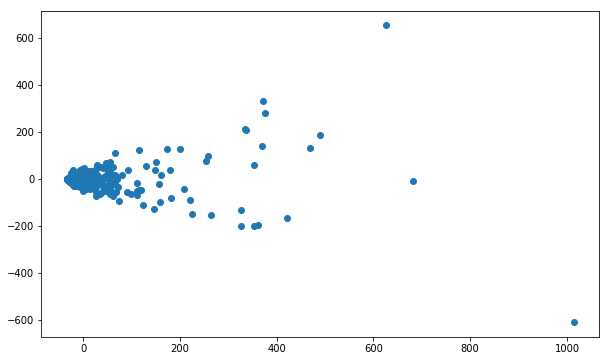

In [27]:
cs1.pmi_plot.show(annotate=False)

Inspections of the PPMI plots and results show that the count adjustments create strange results. The raw data performs better. This perhaps makes sense, since the raw data is not really raw data, but has already been pre-processed and is normalized ratios.

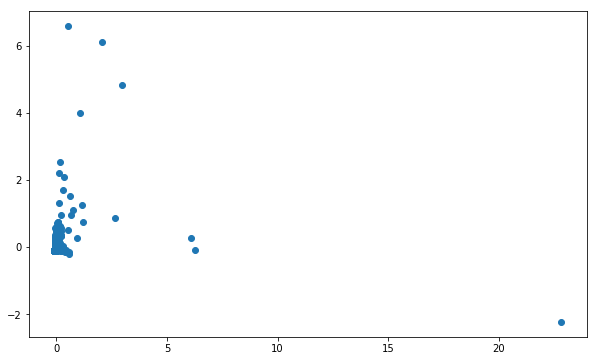

In [28]:
cs1.raw_plot.show(annotate=False)

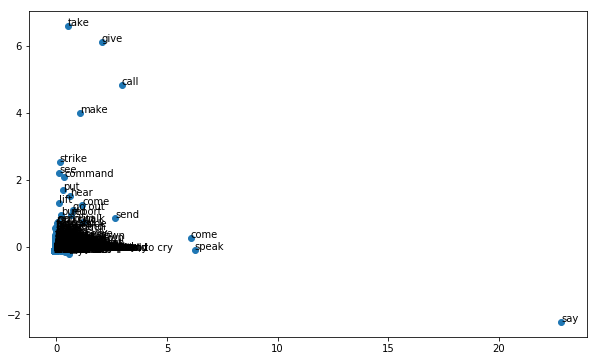

In [29]:
cs1.raw_plot.show()

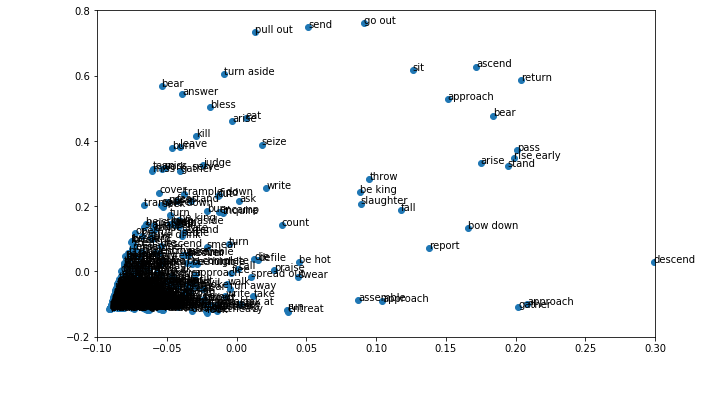

In [30]:
cs1.raw_plot.show(axis=[-0.1, 0.3, -0.2, 0.8])

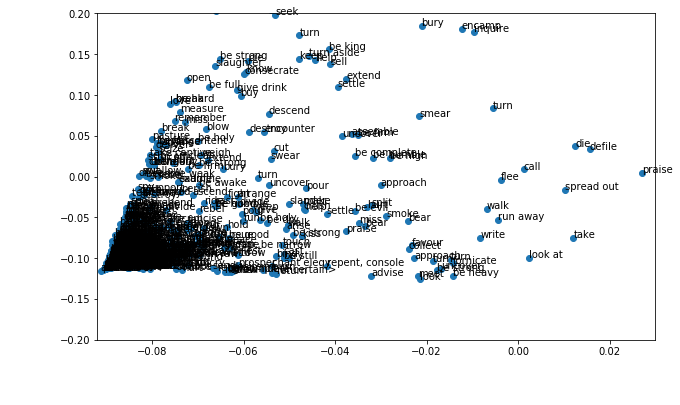

In [31]:
cs1.raw_plot.show(axis=[-0.092, 0.03, -0.2, 0.2])

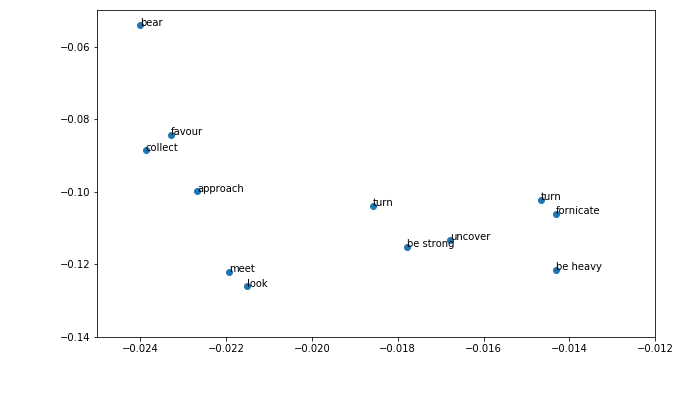

In [32]:
cs1.raw_plot.show(axis=[-0.025, -0.012, -0.14, -0.05])

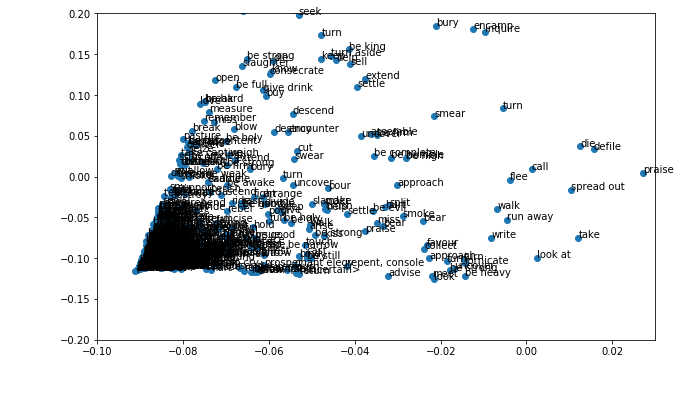

In [33]:
cs1.raw_plot.show(axis=[-0.1, 0.03, -0.2, 0.2])

### Comparison with Unaugmented Space

Below I make comparisons between the non-noun enhanced space with the noun enhanced version. To do this, I simply print similarity scores for the top 10 verbs, and then a few for some random ones.

In [34]:
# build unaugmented space
ve1 = VerbExperiment1(tf_api=tf_api)
vs1 = SemSpace(ve1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     0.45s Finished PPMI...
  0.45s Building pairwise matrices...
  7.42s space is ready!


In [35]:
freq_sorted = cs1.raw.sum().sort_values(ascending=False)

for lex in freq_sorted.index[:10]:
    
    key = f'{lex} ({ce1.target2gloss[lex]})'
    
    print(f'unaugmented verb space, {lex}:')
    print(vs1.similarity_jaccard[key].sort_values(ascending=False).head(10))
    print()
    print(f'augmented verb space, {lex}:')
    print(cs1.similarity_jaccard[key].sort_values(ascending=False).head(10))
    print('\n', '-'*30, '\n')

unaugmented verb space, >MR[.qal:
>MR[.qal (say)       1.000000
BW>[.qal (come)      0.146769
DBR[.piel (speak)    0.122779
QR>[.qal (call)      0.122312
CM<[.qal (hear)      0.110927
CLX[.qal (send)      0.100996
HLK[.qal (walk)      0.099185
R>H[.qal (see)       0.089443
<FH[.qal (make)      0.087409
QWM[.qal (arise)     0.086587
Name: >MR[.qal (say), dtype: float64

augmented verb space, >MR[.qal:
>MR[.qal (say)         1.000000
NGD[.hif (report)      0.418775
R>H[.nif (see)         0.415341
YWH[.piel (command)    0.402118
DBR[.piel (speak)      0.400579
JY>[.qal (go out)      0.390284
QR>[.qal (call)        0.386057
CM<[.qal (hear)        0.372822
<MD[.qal (stand)       0.368486
<LH[.qal (ascend)      0.363208
Name: >MR[.qal (say), dtype: float64

 ------------------------------ 

unaugmented verb space, NTN[.qal:
NTN[.qal (give)    1.000000
FJM[.qal (put)     0.103960
<FH[.qal (make)    0.083568
LQX[.qal (take)    0.082907
>MR[.qal (say)     0.071902
BW>[.hif (come)    0.070632
CL

We see that on many of the samples, the augmented space performs better. Though there are some exceptions. For example, the verb עשה seems to have a couple more relevant lexemes in the augmented space, like בנה. But עשה seems to be a relatively unique verb, since it can be found in quite a number of these similarity tests. It may be worthwhile digging into the frames exhibited by עשה.

Below we test some random similarity scores with a similar printout.

In [58]:
random.seed(a=2)
freq_sorted_random = list(i for i in freq_sorted.index)
random.shuffle(freq_sorted_random)

for lex in freq_sorted_random[:10]:
    
    key = f'{lex} ({ce1.target2gloss[lex]})'
    
    print(f'unaugmented verb space, {lex}:')
    print(vs1.similarity_jaccard[key].sort_values(ascending=False).head(10))
    print()
    print(f'augmented verb space, {lex}:')
    print(cs1.similarity_jaccard[key].sort_values(ascending=False).head(10))
    print('\n', '-'*30, '\n')

unaugmented verb space, K<S[.hif:
K<S[.hif (be discontent)    1.000000
CKX[.qal (forget)           0.062500
KTB[.nif (write)            0.055556
HLL[.piel (praise)          0.055556
T<H[.hif (err)              0.055556
C>R[.hif (remain)           0.038462
GDL[.qal (be strong)        0.038462
BRK[.piel (bless)           0.038462
XRM[.hif (consecrate)       0.037037
ZKR[.qal (remember)         0.032258
Name: K<S[.hif (be discontent), dtype: float64

augmented verb space, K<S[.hif:
K<S[.hif (be discontent)    1.000000
XRM[.hif (consecrate)       0.344541
>HB[.qal (love)             0.281825
XJH[.piel (be alive)        0.271172
R<<[.hif (be evil)          0.267460
SPR[.nif (count)            0.264612
NS<[.hif (pull out)         0.257061
PRY[.qal (break)            0.241034
JBC[.hif (be dry)           0.240255
XB>[.hif (hide)             0.238900
Name: K<S[.hif (be discontent), dtype: float64

 ------------------------------ 

unaugmented verb space, SPR[.piel:
SPR[.piel (count)         1.0

### Various Similarity Scores

In [38]:
cs1.similarity_raw['>MR[.qal (say)'].sort_values(ascending=False).head(10)

>MR[.qal (say)         1.000000
DBR[.piel (speak)      0.824788
NGC[.qal (approach)    0.709331
JD<[.hit (know)        0.649160
HSH[.hif (be still)    0.634489
>SP[.nif (gather)      0.618801
PLL[.hit (pray)        0.592026
BW>[.qal (come)        0.591835
CLX[.qal (send)        0.585538
QRH[.nif (meet)        0.571270
Name: >MR[.qal (say), dtype: float64

In [39]:
cs1.similarity_raw['<FH[.qal (make)'].sort_values(ascending=False).head(10)

<FH[.qal (make)          1.000000
XBR[.piel (be united)    0.388899
PCV[.hif (strip off)     0.370926
KBH[.piel (go out)       0.341888
NTN[.qal (give)          0.334878
CMR[.qal (keep)          0.331861
NGD[.hif (report)        0.327086
CBR[.piel (break)        0.327044
XDC[.piel (be new)       0.316867
BW>[.hif (come)          0.316827
Name: <FH[.qal (make), dtype: float64

In [40]:
cs1.similarity_raw['>KL[.qal (eat)'].sort_values(ascending=False).head(10)

>KL[.qal (eat)           1.000000
CXT[.hif (destroy)       0.402189
CBT[.qal (cease)         0.395644
KWL[.hif (comprehend)    0.366032
PCV[.hif (strip off)     0.347868
MNH[.qal (count)         0.344686
NGF[.qal (drive)         0.330993
LWN[.nif (murmur)        0.311017
NTK[.hif (pour)          0.304349
LQX[.qal (take)          0.284618
Name: >KL[.qal (eat), dtype: float64

In [41]:
cs1.similarity_raw['NTN[.qal (give)'].sort_values(ascending=False).head(10)

NTN[.qal (give)            1.000000
NGD[.hif (report)          0.466319
NGF[.qal (drive)           0.444959
MNH[.qal (count)           0.433092
NTK[.hif (pour)            0.413529
NGD[.hof (report)          0.389489
BW>[.hif (come)            0.389440
LQX[.qal (take)            0.386166
CBH[.qal (take captive)    0.377061
PCV[.hif (strip off)       0.372476
Name: NTN[.qal (give), dtype: float64

In [42]:
cs1.similarity_raw['R>H[.qal (see)'].sort_values(ascending=False).head(10)

R>H[.qal (see)                 1.000000
NCK[.qal (bite)                0.510237
NGF[.qal (drive)               0.493429
RP>[.qal (heal)                0.486377
GLH[.piel (uncover)            0.484053
KBD[.piel (be heavy)           0.481522
MNH[.qal (count)               0.479782
N>P[.piel (commit adultery)    0.479139
SWT[.hif (incite)              0.477065
YWH[.piel (command)            0.454138
Name: R>H[.qal (see), dtype: float64

In [43]:
cs1.similarity_raw['JD<[.qal (know)'].sort_values(ascending=False).head(10)

JD<[.qal (know)                1.000000
ZKR[.qal (remember)            0.532129
SPR[.piel (count)              0.511359
N>P[.piel (commit adultery)    0.424056
>HB[.qal (love)                0.398357
NCK[.qal (bite)                0.386761
DRC[.qal (inquire)             0.377828
YWH[.piel (command)            0.366453
SWT[.hif (incite)              0.347849
XZH[.qal (see)                 0.346937
Name: JD<[.qal (know), dtype: float64

In [44]:
cs1.similarity_raw['MWT[.qal (die)'].sort_values(ascending=False).head(10)

MWT[.qal (die)         1.000000
XTR[.qal (dig)         0.263269
LKD[.nif (seize)       0.236703
XL>[.qal (fall ill)    0.215137
QCR[.hit (tie)         0.208755
BQ<[.nif (split)       0.203686
<FH[.nif (make)        0.196736
QWM[.hof (arise)       0.190749
LQX[.nif (take)        0.184732
XRB[.qal (be dry)      0.174422
Name: MWT[.qal (die), dtype: float64

There are too many quirky results in here. I need to limit the similar terms to those that occur in an identical pattern elsewhere.

In [45]:
cs1.similarity_raw['KRT[.qal (cut)'].sort_values(ascending=False).head(10)

KRT[.qal (cut)           1.000000
PRF[.qal (spread out)    0.372056
GD<[.piel (cut off)      0.371576
ZKR[.qal (remember)      0.337374
CB<[.hif (swear)         0.273131
QVP[.qal (pluck off)     0.268760
CMR[.qal (keep)          0.267974
<FH[.qal (make)          0.245824
NF>[.qal (lift)          0.193060
BW>[.hif (come)          0.189887
Name: KRT[.qal (cut), dtype: float64

In [46]:
cs1.similarity_jaccard['KRT[.qal (cut)'].sort_values(ascending=False).head(10)

KRT[.qal (cut)          1.000000
>KL[.qal (eat)          0.408535
BNH[.qal (build)        0.333924
DBR[.piel (speak)       0.319148
HRG[.qal (kill)         0.316221
<FH[.qal (make)         0.307042
BKH[.qal (weep)         0.293498
ZBX[.qal (slaughter)    0.278274
JCB[.qal (sit)          0.277881
QRB[.hif (approach)     0.267877
Name: KRT[.qal (cut), dtype: float64

<hr>

#### Case Study: כרת and אכל

<hr>

In [47]:
cs1.similarity_raw['YWH[.piel (command)'].sort_values(ascending=False).head(10)

YWH[.piel (command)        1.000000
CPV[.qal (judge)           0.724894
SWT[.hif (incite)          0.698412
RP>[.qal (heal)            0.685492
T<B[.nif (be abhorrent)    0.675891
NCK[.qal (bite)            0.669158
XNV[.qal (embalm)          0.663910
KBD[.piel (be heavy)       0.645257
XV>[.hif (miss)            0.610137
JC<[.hif (help)            0.601411
Name: YWH[.piel (command), dtype: float64

In [48]:
cs1.similarity_jaccard['YWH[.piel (command)'].sort_values(ascending=False).head(10)

YWH[.piel (command)    1.000000
CLX[.qal (send)        0.415321
>MR[.qal (say)         0.402118
CM<[.qal (hear)        0.386597
<LH[.hif (ascend)      0.384457
DBR[.piel (speak)      0.375397
NGD[.hif (report)      0.359819
QR>[.qal (call)        0.351399
JY>[.hif (go out)      0.350342
LQX[.qal (take)        0.342216
Name: YWH[.piel (command), dtype: float64

In [49]:
cs1.similarity_raw['KBD[.piel (be heavy)'].sort_values(ascending=False).head(10)

KBD[.piel (be heavy)           1.000000
KL>[.qal (restrain)            0.700839
NCK[.qal (bite)                0.682570
YWH[.piel (command)            0.645257
SWT[.hif (incite)              0.642663
RP>[.qal (heal)                0.641519
XNV[.qal (embalm)              0.630041
JNQ[.hif (suck)                0.628082
N>P[.piel (commit adultery)    0.598650
XV>[.hif (miss)                0.588358
Name: KBD[.piel (be heavy), dtype: float64

In [50]:
cs1.similarity_jaccard['KBD[.piel (be heavy)'].sort_values(ascending=False).head(10)

KBD[.piel (be heavy)      1.000000
XJH[.hif (be alive)       0.966456
LXY[.qal (press)          0.865646
CKB[.hif (lie down)       0.843181
<BD[.hif (work, serve)    0.840396
JNQ[.hif (suck)           0.833971
XNV[.qal (embalm)         0.740563
RP>[.qal (heal)           0.726598
NCK[.qal (bite)           0.723195
NGF[.qal (drive)          0.715859
Name: KBD[.piel (be heavy), dtype: float64

In [51]:
cs1.similarity_raw['NGD[.hif (report)'].sort_values(ascending=False).head(10)

NGD[.hif (report)            1.000000
NGD[.hof (report)            0.798224
NCQ[.piel (kiss)             0.671892
SPR[.piel (count)            0.577326
XWH[.hsht (bow down)         0.569876
NDR[.qal (vow)               0.534630
NSK[.piel (pour)             0.534630
JDH[.hif (praise)            0.529548
KHN[.piel (act as priest)    0.492801
NCQ[.qal (kiss)              0.487705
Name: NGD[.hif (report), dtype: float64

In [52]:
cs1.similarity_jaccard['NGD[.hif (report)'].sort_values(ascending=False).head(10)

NGD[.hif (report)        1.000000
>MR[.qal (say)           0.418775
XZQ[.qal (be strong)     0.382805
JLD[.qal (bear)          0.377817
XLQ[.qal (divide)        0.376643
PRF[.qal (spread out)    0.366060
CPK[.qal (pour)          0.360281
YWH[.piel (command)      0.359819
SPR[.piel (count)        0.353806
DRC[.qal (inquire)       0.345625
Name: NGD[.hif (report), dtype: float64

In [53]:
cs1.raw['NGD[.hif'].sort_values(ascending=False).head(10)

Pred.Objc.>T_DBR/      0.618012
Pred.Time.<D_KN        0.456521
Pred.Time.MN_>Z        0.444299
Pred.Cmpl.L_DWD==/     0.434617
Pred.Cmpl.L_MLK/       0.338053
Pred.Cmpl.L_C>WL=/     0.312279
Pred.Cmpl.L_MCH=/      0.287575
Pred.Cmpl.<L_BGTN/     0.287457
Pred.Cmpl.L_>B/        0.280291
Pred.Cmpl.<L_>WDWT/    0.278491
Name: NGD[.hif, dtype: float64

In [54]:
cs1.raw['NCQ[.piel'].sort_values(ascending=False).head(10)

Pred.Cmpl.L_>X/      0.025696
Pred.Cmpl.L_BN/      0.024718
Pred.Cmpl.L_MCH=/    0.006462
Pred.Cmpl.L_<M/      0.006125
Pred.Cmpl.L_>JC/     0.005972
Pred.Cmpl.L_>CH/     0.005733
Pred.Cmpl.L_>B/      0.005728
Pred.Cmpl.L_MLK/     0.005578
Pred.Cmpl.L_FR/      0.005450
Pred.Cmpl.L_BT/      0.005347
Name: NCQ[.piel, dtype: float64

Note that נשק "kiss" and נגד "report" are rated similarly due to the `Pred.Cmpl.L_OBJ` construction. They share this attribute.

In [55]:
cs1.similarity_raw['CKB[.qal (lie down)'].sort_values(ascending=False).head(10)

CKB[.qal (lie down)       1.000000
CLM[.hif (be complete)    0.335555
ZNH[.qal (fornicate)      0.248130
LXM[.nif (fight)          0.193922
J<Y[.nif (advise)         0.175755
QBR[.nif (bury)           0.167442
LJN[.qal (lodge)          0.166362
MLV[.nif (escape)         0.143792
R>H[.nif (see)            0.098966
BKH[.qal (weep)           0.096894
Name: CKB[.qal (lie down), dtype: float64

In [56]:
cs1.similarity_jaccard['CKB[.qal (lie down)'].sort_values(ascending=False).head(10)

CKB[.qal (lie down)            1.000000
QBR[.nif (bury)                0.320385
LXM[.nif (fight)               0.258661
JCB[.qal (sit)                 0.244716
HLK[.hit (walk)                0.224832
RJB[.qal (contend)             0.204347
CLM[.hif (be complete)         0.196491
J<Y[.nif (advise)              0.194319
<BR[.qal (pass)                0.193821
XTN[.hit (be father-in-law)    0.171118
Name: CKB[.qal (lie down), dtype: float64

Why שכב and שלם?

In [59]:
cs1.raw['CKB[.qal'].sort_values(ascending=False).head(10)

Pred.Cmpl.<M_>B/       1.151187
Pred.Time.B_N<WRJM/    0.930411
Pred.Time.<D_BQR=/     0.557640
Pred.Cmpl.B_MCKB/      0.323216
Pred.Time.B_LJLH/      0.311183
Pred.Time.<D_LJLH/     0.250330
Pred.Cmpl.<M_>M/       0.214399
Pred.Cmpl.<M_MLK/      0.196035
Pred.Cmpl.<M_>X/       0.179342
Pred.Cmpl.<L_MVH=/     0.167009
Name: CKB[.qal, dtype: float64

In [41]:
cs1.raw['CLM[.hif'].sort_values(ascending=False).head(10)

Pred.Cmpl.>T==_JFR>L/    0.051109
Pred.Cmpl.<M_MLK/        0.024413
Pred.Cmpl.>L_BN/         0.022021
Pred.Cmpl.<M_DWD==/      0.021688
Pred.Cmpl.>T==_JHWDH/    0.012578
Pred.Cmpl.>T==_<M/       0.010707
Pred.Cmpl.<M_C>WL=/      0.010026
Pred.Cmpl.>T==_DWD==/    0.008606
Pred.Cmpl.>T==_J<QB/     0.008418
Pred.Cmpl.<M_CLMH=/      0.008385
Name: CLM[.hif, dtype: float64

<hr>

#### Case Study: שלם & שכב

How are these two words related?

Note such similarities as `Pred.Cmpl.<M_MLK/`, i.e. to "make peace with a king" or "to lie with a king." This complement occurs quite a bit in both. It is thus a shared attribute, in some sense. But how to explain what is happening here? 

Note that neither שלם nor שכב occur with a direct object in our dataset. Below is the sorted list of object values, which are zero for both verbs.

In [102]:
cs1.raw['CLM[.hif'][cs1.raw['CLM[.hif'].index.str.contains('Objc')].sort_values(ascending=False).head()

Pred.Objc.MN_ZRX=/    0.0
PreS.Objc.>T_NCP/     0.0
PreS.Objc.>T_NCKH/    0.0
PreS.Objc.>T_NBXZ/    0.0
PreS.Objc.>T_NBX=/    0.0
Name: CLM[.hif, dtype: float64

In [103]:
cs1.raw['CKB[.qal'][cs1.raw['CKB[.qal'].index.str.contains('Objc')].sort_values(ascending=False).head()

Pred.Objc.MN_ZRX=/    0.0
PreS.Objc.>T_NCP/     0.0
PreS.Objc.>T_NCKH/    0.0
PreS.Objc.>T_NBXZ/    0.0
PreS.Objc.>T_NBX=/    0.0
Name: CKB[.qal, dtype: float64

Let's dig deeper and look at the tendencies of שלם in the hifil.

In [117]:
clm_instances = '''
clause
    phrase function=Pred|PreO|PreS|PtcO
        word pdp=verb lex=CLM[ vs=hif
    phrase function=Cmpl
'''

ckb_instances = '''
clause
    phrase function=Pred|PreO|PreS|PtcO
        word pdp=verb lex=CKB[ vs=qal
    phrase function=Cmpl
'''

clm_instances = B.search(clm_instances)
ckb_instances = B.search(ckb_instances)

8 results
106 results


In [105]:
for r in clm_instances:
    highlights = [r[2]] + list(L.d(r[3], 'word'))
    B.pretty(r[0], highlights=highlights)

In [118]:
for r in ckb_instances[:10]:
    highlights = [r[2]] + list(L.d(r[3], 'word'))
    B.pretty(r[0], highlights=highlights)

The source of the similarity is that both שלם and שכב commonly occur with the complement prepositional phrases of את or עם. So what is the formal difference between these two verbs? One difference that we can see is that שלם does not occur with the complement preposition ב:

In [119]:
cs1.raw['CLM[.hif'][cs1.raw['CLM[.hif'].index.str.contains('\.B_')].sort_values(ascending=False).head()

PtcO.Adju.B_ZRX=/     0.0
PreO.Time.B_ZBL=/     0.0
PreO.Time.B_ZQNH/     0.0
PreO.Time.B_ZQNJM/    0.0
PreO.Time.B_ZR/       0.0
Name: CLM[.hif, dtype: float64

The jaccardian method, since it indexes the lack of the ב complement element, successfully separates שלם from שכב. Below can be seen the jaccardian results, which appear to produce better results. This is because the jaccardian method simply tallies how many elements have an observed value. Still, what about the most similar element, קבר in niphal, and "fight"?

In [111]:
cs1.similarity_jaccard['CKB[.qal (lie down)'].sort_values(ascending=False).head(10)

CKB[.qal (lie down)            1.000000
QBR[.nif (bury)                0.320385
LXM[.nif (fight)               0.258661
JCB[.qal (sit)                 0.244716
HLK[.hit (walk)                0.224832
RJB[.qal (contend)             0.204347
CLM[.hif (be complete)         0.196491
J<Y[.nif (advise)              0.194319
<BR[.qal (pass)                0.193821
XTN[.hit (be father-in-law)    0.171118
Name: CKB[.qal (lie down), dtype: float64

In [5]:
cs1.raw['QBR[.nif'].sort_values(ascending=False).head(10)

Pred.Loca.B_<PRH/       0.921299
Pred.Cmpl.B_CMJR==/     0.753210
Pred.Cmpl.B_QMWN/       0.753210
Pred.Cmpl.B_PR<TWN/     0.753210
Pred.Cmpl.B_>JLWN==/    0.529085
Pred.Cmpl.B_TRYH/       0.410354
Pred.Cmpl.B_QBR/        0.398452
Pred.Cmpl.B_CMRWN/      0.378373
Pred.Cmpl.B_BJT_LXM/    0.362527
Pred.Cmpl.B_<JR/        0.348143
Name: QBR[.nif, dtype: float64

In [6]:
cs1.raw['LXM[.nif'].sort_values(ascending=False).head(10)

Pred.Cmpl.B_KRKMJC/    0.482089
Pred.Cmpl.B_RB/        0.386639
Pred.Cmpl.B_>CDWD/     0.368766
Pred.Cmpl.B_HDD<ZR/    0.300424
Pred.Cmpl.B_BQ<H/      0.237593
Pred.Cmpl.B_PLCTJ/     0.208966
Pred.Cmpl.<M_JFR>L/    0.204838
Pred.Cmpl.B_<MLQ/      0.201506
Pred.Cmpl.B_KN<NJ/     0.181102
Pred.Cmpl.B_JFR>L/     0.174959
Name: LXM[.nif, dtype: float64

It seems that the complement element with ב, in this case, has resulted in matches across קבר and לחם. Do these verbs also occur with עם?

In [7]:
cs1.raw['QBR[.nif'][cs1.raw['QBR[.nif'].index.str.contains('\.<M_')].sort_values(ascending=False).head()

Pred.Cmpl.<M_>B/     0.237009
Pred.Adju.<M_MLK/    0.047273
Pred.Cmpl.<M_>M/     0.044141
Pred.Adju.<M_>B/     0.040927
Pred.Cmpl.<M_MLK/    0.040360
Name: QBR[.nif, dtype: float64

קבר *does* occur with this עם. The first example gives a clue, "with father(s)." This probably comes from biblical statements wherein kings are buried "with their fathers." This term really belongs with שכב, since "lie down with father(s)" also refers to burial! We see here that the polysemy of שכב results in a variety of similarity matches. These can be processed later with disambiguation.

What about לחם?

In [8]:
cs1.raw['LXM[.nif'][cs1.raw['LXM[.nif'].index.str.contains('\.<M_')].sort_values(ascending=False).head()

Pred.Cmpl.<M_JFR>L/       0.204838
Pred.Cmpl.<M_LCM=/        0.162583
Pred.Cmpl.<M_>JB[         0.111233
Pred.Cmpl.<M_LBNH====/    0.104993
Pred.Cmpl.<M_>MYJHW/      0.084909
Name: LXM[.nif, dtype: float64

This example requires further inquiry into the arguments of לחם in nifal.

In [9]:
lxm_instances = '''
clause
    phrase function=Pred|PreO|PreS|PtcO
        word pdp=verb lex=LXM[ vs=nif
    phrase function=Cmpl
'''

lxm_instances = B.search(lxm_instances)

121 results


In [11]:
for r in lxm_instances[:10]:
    highlights = [r[2]] + list(L.d(r[3], 'word'))
    B.pretty(r[0], highlights=highlights)

לחם shows numerous similar arguments with שכב, including ב, את, and עם. This begs the question: what is the formal difference between them?

We do see that לחם, when it uses the ב complement, has a person as the prepositional object. Where שכב has a location. The addition of the noun space *should* disambiguate the difference. However, in the Jaccardian method, the model does not see any difference between the nouns—they are all weighted the same.

To test this, let's see if לחם can be found in the top results of the ppmi method...

In [14]:
cs1.similarity_pmi['CKB[.qal (lie down)'].sort_values(ascending=False).head(10)

CKB[.qal (lie down)       1.000000
QBR[.nif (bury)           0.532566
JCB[.qal (sit)            0.459904
J<Y[.nif (advise)         0.452322
CLM[.hif (be complete)    0.420347
RJB[.qal (contend)        0.356601
HLK[.hit (walk)           0.337484
LXM[.nif (fight)          0.331099
KRT[.qal (cut)            0.327706
HLK[.qal (walk)           0.312714
Name: CKB[.qal (lie down), dtype: float64

## Attempt Clustering

In [87]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.nan_to_num(cs1.pairwise_raw, 0))
cluster_1_count = kmeans.labels_[kmeans.labels_ == 0].shape[0]
cluster_2_count = kmeans.labels_[kmeans.labels_ == 1].shape[0]

print(f'cluster_1 size: {cluster_1_count} ({round(cluster_1_count / kmeans.labels_.shape[0], 3)})')
print(f'cluster_2 size: {cluster_2_count} ({round(cluster_2_count / kmeans.labels_.shape[0], 3)})')

cluster_1 size: 174 (0.219)
cluster_2 size: 620 (0.781)


In [88]:
cglossedmin = pd.DataFrame(kmeans.labels_, 
                           index=[f'{F.lex.v(ce1.target2lex[w])}.{F.vs.v(ce1.target2node[w])} -- {ce1.target2gloss[w]}' for w in cs1.raw.columns], 
                           columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=cs1.raw.columns, 
                        columns=['cluster']).fillna(0)

cglossedmin[cglossedmin.cluster == 0].head(10)

,cluster
"<BD[.qal -- work, serve",0
<FH[.qal -- make,0
<LH[.hif -- ascend,0
<NH[.qal -- answer,0
<QD[.qal -- bind,0
<QR[.piel -- root up,0
<WR=[.piel -- be blind,0
<WR[.hif -- be awake,0
<WR[.piel -- be awake,0
<YB[.piel -- hurt,0


In [33]:
cglossedmin[cglossedmin.cluster == 1].head(10)

,cluster
"<BD[.hif -- work, serve",1
"<BD[.qal -- work, serve",1
<BR[.hif -- pass,1
<FH[.qal -- make,1
<LH[.hif -- ascend,1
<MD[.hif -- stand,1
<NC[.qal -- fine,1
<NH=[.piel -- be lowly,1
<NH[.qal -- answer,1
<QD[.qal -- bind,1


In [ ]:
clust1_tendencies = cs2.raw[clustmin[clustmin.cluster == 0].index].sum(axis=1).sort_values(ascending=False)
clust2_tendencies = cs2.raw[clustmin[clustmin.cluster == 1].index].sum(axis=1).sort_values(ascending=False)

clust1_tendencies.head(30)

In [ ]:
clust2_tendencies.head(30)

## Subject/Object Only Space

Below we experiment with building the verb space with only subject/object basis elements. The primary goal here is to get a binary division of the verbs. I hope to see something like active versus passive or dynamic versus stative.

In [4]:
indent(reset=True)
info('building composite experiment...')
ce2 = CompositeVerbSubObj(ns1.sim_pmi_normalized, tf_api=tf_api) 
info(f'composite experiment with dim {ce2.data.shape} ready...')

  0.00s building composite experiment...
    19s composite experiment with dim (24696, 1288) ready...


In [5]:
cs2 = SemSpace(ce2, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     2.77s Finished PPMI...
  2.77s Building pairwise matrices...
    33s space is ready!


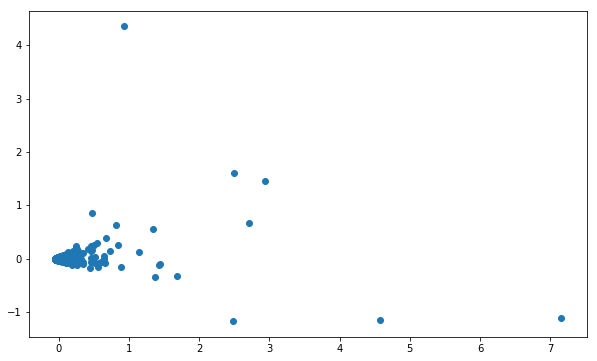

In [6]:
cs2.raw_plot.show(annotate=False)

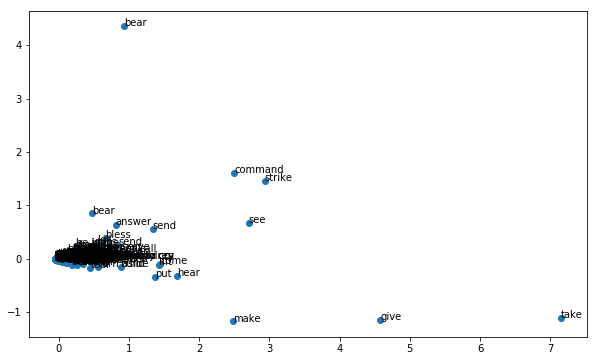

In [7]:
cs2.raw_plot.show()

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.nan_to_num(cs2.pairwise_raw, 0))
cluster_1_count = kmeans.labels_[kmeans.labels_ == 0].shape[0]
cluster_2_count = kmeans.labels_[kmeans.labels_ == 1].shape[0]

print(f'cluster_1 size: {cluster_1_count} ({round(cluster_1_count / kmeans.labels_.shape[0], 3)})')
print(f'cluster_2 size: {cluster_2_count} ({round(cluster_2_count / kmeans.labels_.shape[0], 3)})')

cluster_1 size: 1006 (0.781)
cluster_2 size: 282 (0.219)


In [12]:
cglossedmin = pd.DataFrame(kmeans.labels_, 
                           index=[f'{F.lex.v(ce2.target2lex[w])}.{F.vs.v(ce2.target2node[w])} -- {ce2.target2gloss[w]}' for w in cs2.raw.columns], 
                           columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=cs2.raw.columns, 
                        columns=['cluster']).fillna(0)

cglossedmin[cglossedmin.cluster == 0]

,cluster
<BH[.qal -- be thick,0
<BR=[.hit -- be angry,0
<BR[.piel -- pass,0
<BR[.qal -- pass,0
<BT[.piel -- pervert,0
<CN[.qal -- smoke,0
<CQ[.qal -- oppress,0
<CR[.hif -- become rich,0
<DH[.qal -- adorn,0
<DN[.hit -- be luxurious,0


In [13]:
cglossedmin[cglossedmin.cluster == 1]

,cluster
"<BD[.hif -- work, serve",1
"<BD[.qal -- work, serve",1
<BR[.hif -- pass,1
<FH[.qal -- make,1
<LH[.hif -- ascend,1
<MD[.hif -- stand,1
<NC[.qal -- fine,1
<NH=[.piel -- be lowly,1
<NH[.qal -- answer,1
<QD[.qal -- bind,1


### Survey Cluster Tendencies

In [34]:
clust1_tendencies = cs2.raw[clustmin[clustmin.cluster == 0].index].sum(axis=1).sort_values(ascending=False)
clust2_tendencies = cs2.raw[clustmin[clustmin.cluster == 1].index].sum(axis=1).sort_values(ascending=False)

clust1_tendencies.head(40)

Pred.Objc.>T_XWX/        2.000000
Pred.Objc.>T_NSK/        1.121043
Pred.Objc.>T_JRDN/       1.074358
Pred.Objc.>T_BRJT/       1.054935
Pred.Objc.>T_MFKRT/      1.000000
Pred.Objc.>T_GZH/        1.000000
Pred.Objc.>T_JQWM/       1.000000
Pred.Objc.>T_NWH/        1.000000
Pred.Objc.>T_MWY>=/      0.916271
Pred.Objc.>T_CBT/        0.906876
Pred.Objc.>T_GZZ/        0.901625
Pred.Objc.>T_BDQ/        0.892731
Pred.Objc.>T_GBWRH/      0.885376
Pred.Objc.>T_>XWH/       0.885252
Pred.Objc.>T_LMK/        0.873448
Pred.Objc.>T_<YH/        0.870130
Pred.Objc.>T_GLGLT/      0.865775
Pred.Objc.>T_CBLT/       0.839409
PreO.Objc.>T_V<M/        0.824341
Pred.Objc.>T_C<R/        0.822636
Pred.Objc.>T_BJT_>WN/    0.795693
Pred.Objc.>T_TRX/        0.781436
Pred.Objc.>T_MYWRH/      0.771749
Pred.Objc.>T_BJT/        0.768848
Pred.Objc.>T_KNP/        0.767856
Pred.Objc.>T_MPLYT/      0.754675
Pred.Objc.>T_YBJ>/       0.752476
Pred.Objc.>T_>XJXD/      0.752476
Pred.Objc.>T_>BJVWB/     0.752476
Pred.Objc.>T_F

In [35]:
clust2_tendencies.head(50)

Pred.Objc.>T_DBR/       7.139635
Pred.Objc.>T_<M/        7.070519
Pred.Objc.>T_BN/        6.564136
Pred.Objc.>T_BJT/       6.121090
Pred.Objc.>T_>JC/       6.058701
Pred.Objc.>T_MLK/       5.919580
Pred.Objc.>T_JFR>L/     5.872751
Pred.Objc.>T_FR/        5.750683
Pred.Objc.>T_MCH=/      5.728190
Pred.Objc.>T_DWD==/     5.615826
Pred.Objc.>T_YJDH/      5.332935
Pred.Objc.>T_JHWH/      5.208704
Pred.Objc.>T_KL/        5.069635
Pred.Objc.>T_<BD/       4.957584
Pred.Objc.>T_C>WL=/     4.839912
Pred.Objc.>T_<JR/       4.796924
Pred.Objc.>T_>RWN/      4.788294
Pred.Objc.>T_JD/        4.734432
Pred.Objc.>T_>CH/       4.686424
Pred.Objc.>T_>RY/       4.653468
Pred.Objc.>T_>LHJM/     4.632728
Pred.Objc.>T_N<R/       4.559178
Pred.Objc.>T_J<QB/      4.498227
Pred.Objc.>T_JHWC</     4.366024
Pred.Objc.>T_ML>K/      4.257781
Pred.Objc.>T_GD<WN/     4.043353
Pred.Objc.>T_JHWDH/     4.021434
Pred.Objc.>T_CM/        4.006427
Pred.Objc.>T_JW>B/      3.996238
Pred.Objc.>T_JRMJHW/    3.991378
Pred.Objc.

Both clusters show a majority use of the object function. It appears that cluster 1 contains more uses of inanimate objects while cluster 2 contains more people objects.